# Boxplot

Sometimes less is more!

We saw in the lecture that if we want to compare several data distributions, it can be useful to have a plot that highlights key features (the median and quartiles) whilst eliminaating unnecessary detail

The boxplot can do this job

## Oxford Weather example

We will work with historical data from the Oxford weather centre

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/OxfordSnow.jpg" width="50%"  />

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()

### Load and inspect the data

Let's load some historical data about the weather in Oxford, from the file "OxfordWeather.csv"

In [2]:
weather = pandas.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/OxfordWeather.csv")
display(weather)

/var/folders/q4/twg1yll54y142rc02m5wwbt40000gr/T/ipykernel_89261/3980356552.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pandas.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/OxfordWeather.csv")


,YYYY,MM,DD,Tmax,Tmin,Tmean,Trange,Rainfall_mm
0,1827,1,1,8.3,5.6,7.0,2.7,0.0
1,1827,1,2,2.2,0.0,1.1,2.2,0.0
2,1827,1,3,-2.2,-8.3,-5.3,6.1,9.7
3,1827,1,4,-1.7,-7.8,-4.8,6.1,0.0
4,1827,1,5,0.0,-10.6,-5.3,10.6,0.0
...,...,...,...,...,...,...,...,...
71338,2022,4,26,15.2,4.1,9.7,11.1,0
71339,2022,4,27,10.7,2.6,6.7,8.1,0
71340,2022,4,28,12.7,3.9,8.3,8.8,0
71341,2022,4,29,11.7,6.7,9.2,5,0


Have a look at the dataframe. 

What do you think is contained in each column? 

<ul>
<li>Each row is a single day from 1827 to 2022. The columns YYYY,MM,DD give the date.
<li>The columns Tmax, Tmin and Tmean give information about the temperature
<li>We also have a record of the rainfall each day
</ul>

### Plot the temperature

Say we want to plot the mean temperature in each month of the year. We have almost 200 datapoints for every date (and 30ish dates within each month, so 6000 measurements per month!)

We can summarise the distribution of temperatures in each month using a boxplot:

<AxesSubplot:xlabel='MM', ylabel='Tmax'>

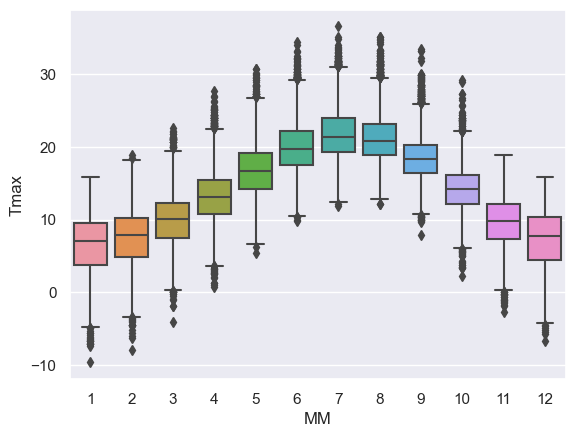

In [3]:
sns.boxplot(data=weather, x="MM", y="Tmax")

Using a simple boxplot for each month, we can easily see the trend across months for warmer weather in the summer and cooler weather in the winter.

Within each month we can also see some information about the distribution - for example:

<ul>
    <li> Temperatures are more variable in winter and summer, than in autumn and spring
    <li> In winter, the distribution of temperatures has negative skew (there are some unusually cold years) but in summer the converse is true - this is evident from the position of the median within each box but is clearer in a violinplot (see below)
</ul>

### Comparing patterns

Has the pattern of temperatures changed over the years?

Let's compare temperatures in the 19th, 20th and 21st century. 

To do so we add a 'century' column to our dataframe. We use the <a href="https://pandas.pydata.org/docs/reference/api/pandas.cut.html"><tt>pandas.cut</tt></a> function to categorise the values of year into 18thC, 19thC and 20thC

In [4]:
weather['CCCC'] = pandas.cut(x=weather['YYYY'], bins=[1800,1900,2000,2100], labels=["18thC","19thC","20thC"])
display(weather)

,YYYY,MM,DD,Tmax,Tmin,Tmean,Trange,Rainfall_mm,CCCC
0,1827,1,1,8.3,5.6,7.0,2.7,0.0,18thC
1,1827,1,2,2.2,0.0,1.1,2.2,0.0,18thC
2,1827,1,3,-2.2,-8.3,-5.3,6.1,9.7,18thC
3,1827,1,4,-1.7,-7.8,-4.8,6.1,0.0,18thC
4,1827,1,5,0.0,-10.6,-5.3,10.6,0.0,18thC
...,...,...,...,...,...,...,...,...,...
71338,2022,4,26,15.2,4.1,9.7,11.1,0,20thC
71339,2022,4,27,10.7,2.6,6.7,8.1,0,20thC
71340,2022,4,28,12.7,3.9,8.3,8.8,0,20thC
71341,2022,4,29,11.7,6.7,9.2,5,0,20thC


Now we can use the argument <tt>hue</tt> in <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html"><tt>seaborn.boxplot</tt></a> to produce parallel box plots.

<AxesSubplot:xlabel='MM', ylabel='Tmean'>

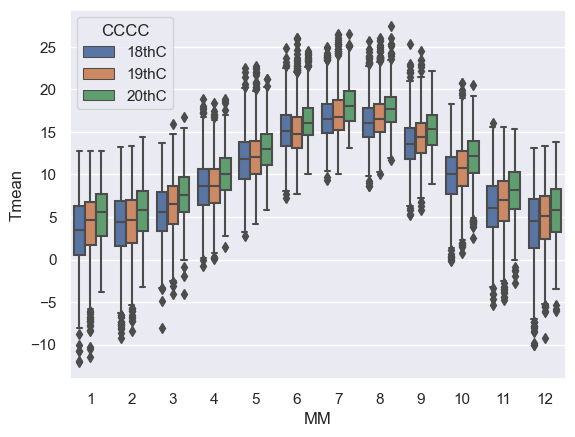

In [5]:
sns.boxplot(data=weather, x="MM", y="Tmean", hue="CCCC")

It looks like Oxford has been getting a bit warmer over the centuries.

## Violinplot

Using Python, you can make a slighly fancier version of the boxplot called a violinplot. 

The violinplot shows the full distribution of data rather than the summary captured in a boxplot - the violin body is basically a KDE plot.

Let's give it a try using the function <a href="https://seaborn.pydata.org/generated/seaborn.violinplot.html"><tt>sns.violinplot</tt></a>

<AxesSubplot:xlabel='MM', ylabel='Tmax'>

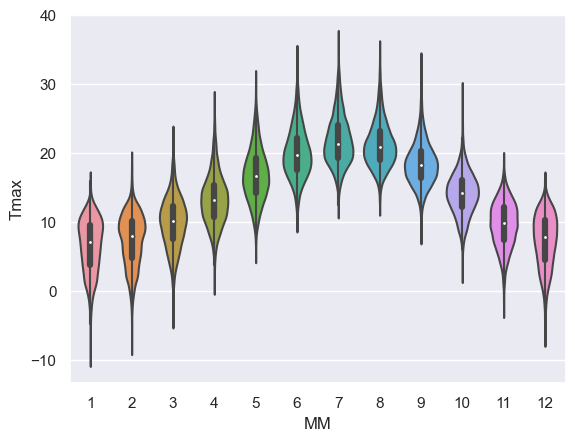

In [6]:
sns.violinplot(data=weather, x="MM", y="Tmax")

This is a nice compromise - still easy to "eyeball" the pattern across categories (in this case, across months) but giving plenty of detail within each category also

Note for example that the trend for:
<ul>
    <li>negative skew in temperature in winter (outliers are cold days)
    <li>positive skew in summer (outliers are hot days)
</ul>
...is much more clearly visible in the violin plot than in a box plot.